Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию, нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [26]:
def linan(coef1_data, coef2_data):
  try:
    det_global = coef1_data[0] * coef2_data[1] - coef1_data[1] * coef2_data[0]
    det_x = coef1_data[2] * coef2_data[1] - coef2_data[2] * coef1_data[1]
    det_y = coef1_data[0] * coef2_data[2] - coef2_data[0] * coef1_data[2]
    x = det_x / det_global
    y = det_y / det_global
    return x, y
  except ZeroDivisionError:
    print("деление на ноль")

print("Введите коэффициенты каждого уравнения")
coef1_data = list(map(float, input().split()))
coef2_data = list(map(float, input().split()))

if len(coef1_data) == 3 and len(coef2_data) == 3:
  answer = linan(coef1_data, coef2_data)
  print(answer[0], answer[1])
else:
  print("В одну строку можно ввести только 3 значения")



Введите коэффициенты каждого уравнения
1 1 2
1 1 2
деление на ноль


TypeError: ignored

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [27]:
import numpy as np

def decorate_matrix(n):
  A = np.zeros((n, n))
  A[0:1] = 1
  A[(n-1):] = 1
  A[:,0] = 1
  A[:,n-1] = 1
  return A

n = int(input())

if n > 0:
  A = np.array(decorate_matrix(n))
  print(A)
else:
  print("n должно быть целым и положительным")

12
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [29]:
import numpy as np
from matplotlib import pyplot as plt

# через numpy
def f(x, a, b):
  return (x + a)**2 - b

def g(x, a, b):
  return np.abs(f(x, a, b))

a = float(input())
b = float(input())

xf_values = np.linspace(-10, 10, 1000)
yf_values = f(xf_values, a, b)

min_index = np.argmin(yf_values)
min_xf = xf_values[min_index]
min_yf = yf_values[min_index]

print(round(min_xf, 4), round(min_yf, 4))


xg_values = np.linspace(-10, 10, 1000)
yg_values = g(xg_values, a, b)

min_index = np.argmin(yg_values)
min_xg = xg_values[min_index]
min_yg = yg_values[min_index]

print(round(min_xg, 4), round(min_yg, 4))

3
4
-2.993 -4.0
-4.995 0.02


In [22]:
# градиентный спуск

import numpy as np
import random
from matplotlib import pyplot as plt

def F(x, a, b):
  return (x + a)**2 - b  # (x^2 + 2ax + a^2 - b)' = 2x + 2a

def f(x, a, b):
  return 2 * x + 2 * a

def G(x, a, b):
  return abs(F(x, a, b))

def g(x, a, b):
  return ((2 * x + 2 * a)*(x**2 + 2 * a * x - b + a**2)) / abs(x**2 + 2 * a * x - b + a**2)

def gradient_descent_f(a, b, learning_rate=0.01, num_iterations=10000, tolerance=1e-12):
  x = 0
  for i in range(num_iterations):
    gradient = f(x, a, b)
    x_new = x - learning_rate * gradient
    if abs(x_new - x) < tolerance:
      break
    x = x_new
  return x

def gradient_descent_g(a, b, learning_rate=0.01, num_iterations=10000, tolerance=1e-12):
  x = 0
  for i in range(num_iterations):
    gradient = g(x, a, b)
    x_new = x - learning_rate * gradient
    if abs(x_new - x) < tolerance:
      break
    x = x_new
  return x

a = float(input())
b = float(input())

min_xf = gradient_descent_f(a, b)
min_yf = F(min_xf, a, b)

min_xg = gradient_descent_g(a, b)
min_yg = G(min_xg, a, b)

print(min_xf, min_yf)
print(min_xg, min_yg)

3
4
-2.9999999999505724 -4.0
-0.9894153176410175 0.04245076493656974


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

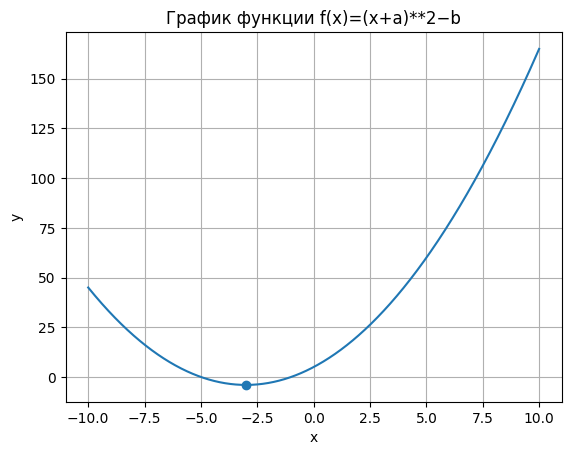

In [ ]:
x = np.linspace(-10, 10, 1000)
y = (x + a)**2 - b

fig, ax = plt.subplots()
ax.plot(x, y)

plt.title('График функции f(x)=(x+a)**2−b')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(min_xf, min_yf)
plt.grid(True)
plt.show()

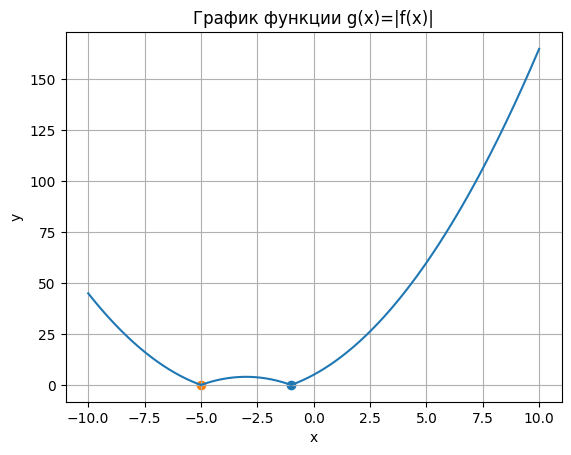

In [9]:
x = np.linspace(-10, 10, 1000)
y = np.abs((x + a)**2 - b)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title('График функции g(x)=|f(x)|')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(-0.9894153176410175, 0.04245076493656974) #gradient
plt.scatter(-4.994994994994995, 0.019994969944920005) #numpy
plt.grid(True)
plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [16]:
#ex1
#решение по последовательность
'''
1 попадание = 1\2
2 попадание = 1\2

'''

n = 9
p = 1/2

p_n = (p)**n #9 раз выпала одна сторона, фиксируем первую

p_no_a = (1 - p_n)**1000 #ни у кого ни разу не выпала та же сторона
p_a = 1 - p_no_a

print(p_a)

0.858440454732242


In [ ]:
#ex2

n = 2**10 #число элементарных исходов
m = 10
#число благоприятных исходов: тк нужно 8 раз подряд одну и ту же сторону, то вероятные комбинации {ООООООООРР, РРОООООООО, Р00000000Р, ОРОООООООО, ООООООООРО} * 2,
#так как нам не важно что выпало 8 раз: решка или орёл
p = m / n

p_no_a = (1 - p)**1000 #ни у кого ни разу не выпала такая комбинация

p_a = 1 - p_no_a

print(p_a)

0.9999452986105908


In [17]:
#ex3

import math

#Bernulli

k = 9 #бросок монеты
p_k = 1/2

n = 1000
m = 3

p = p_k**k
q = 1 - p

P_m_n = math.comb(n, m) * p**m * q**(n-m)


print(P_m_n)

0.1762873858121736
